This file shows the distribution of multiple variables in Discrimination and MSM.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
P18_data_path = "../data/P18_Final_Data_07162019.csv"
discrimination_data_path = "../data/discrimination/NYC-RacismNHomophobia.csv"
statistic_discrimination_data_path = "../data/discrimination/P18_GPS_AWM_Twitter_data_summarystats.xlsx"


In [3]:
survey_features_list = ["AI_Total", "AI_Condom", "AI_Condomless", "IAI_Total", "IAI_Condom", "IAI_Condomless", 
                        "RAI_Total", "RAI_Condom", "RAI_Condomless", "drug_use"]

# Discrimination - grid cell variables
discrimination_features_list = ["SSSOM_Rac (in %)", "SSSOM_Hom (in %)", "NormalRacistTweets (in %)", 
                                "Zip_Rac (in %)", "Zip_Hom (in %)"]
discrimination_features_dict = {"SSSOM_Rac (in %)":"SSSOM_Rac_grid", "SSSOM_Hom (in %)":"SSSOM_Hom_grid", 
                                "NormalRacistTweets (in %)":"Rac_tweets_grid", "Zip_Hom (in %)":"Zip_Hom_grid",
                                "Zip_Rac (in %)":"Zip_Rac_grid"}

# Discrimination - statistics variables
AWM_discrimination_features_list = ["AWM_SSSOM_Rac", "AWM_SSSOM_Hom", "AWM_Rac_tweets", 
                                 "AWM_Zip_Rac", "AWM_Zip_Hom", "Area_km"]

In [4]:
df_p18 = pd.read_csv(P18_data_path)
df_p18[:3]

,Unnamed: 0,a_pid,Geo_Zip,subject_visit1,gpsid_visit1,datef1_visit1,agef1_visit1,crossq1a,crossq1b,zipcode,...,Home_Days,Days_All,Hours_All,Seconds_All,Away_Seconds,Away_Hours,Away_Days,Perct_T_Home,Perct_T_Away,Home_Zip_Code_R
0,1,7041,11372.0,7041.0,22723.0,2017-01-30,1990-10-04,83rd st,northern blvd,11370.0,...,8.030521,13.402037,321.648889,1157936.0,464099.0,128.916389,5.371516,0.599202,0.400798,1757.0
1,2,7060,10550.0,7060.0,10156.0,2017-02-23,1991-06-15,2nd Avenue,E 2nd Street,10550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,7068,10467.0,7068.0,10601.0,2017-01-25,1990-10-08,Holland Avenue,Allerton Avenue,10467.0,...,11.765394,13.905926,333.742222,1201472.0,184942.0,51.372778,2.140532,0.846070,0.153930,2943.0


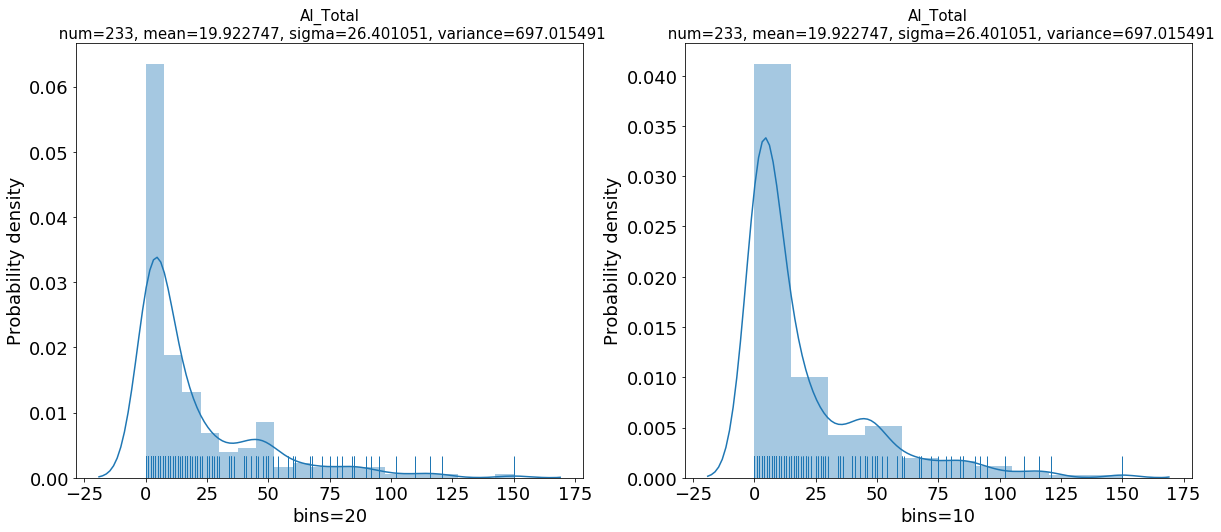

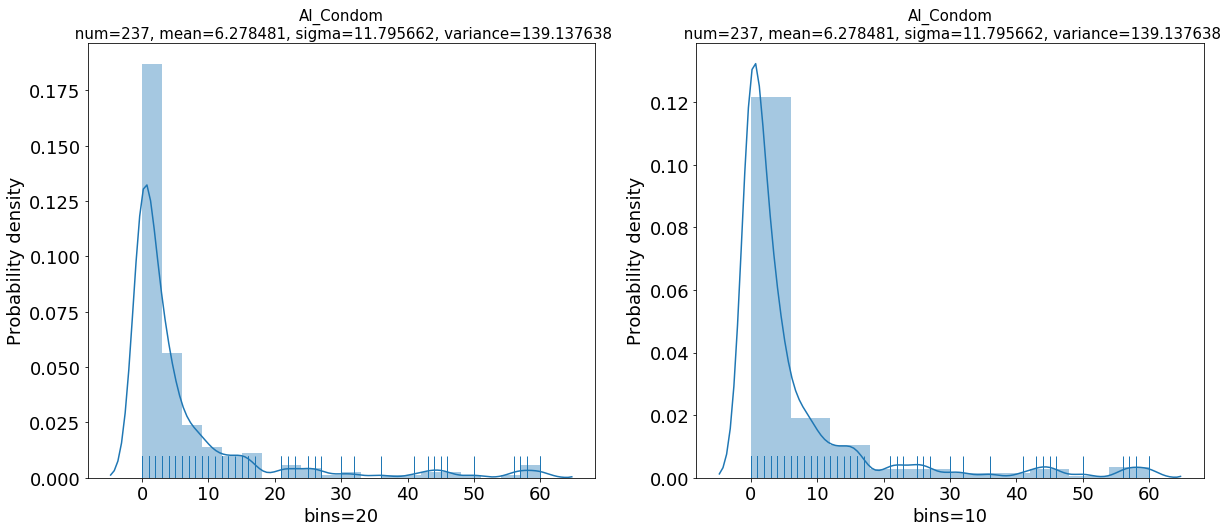

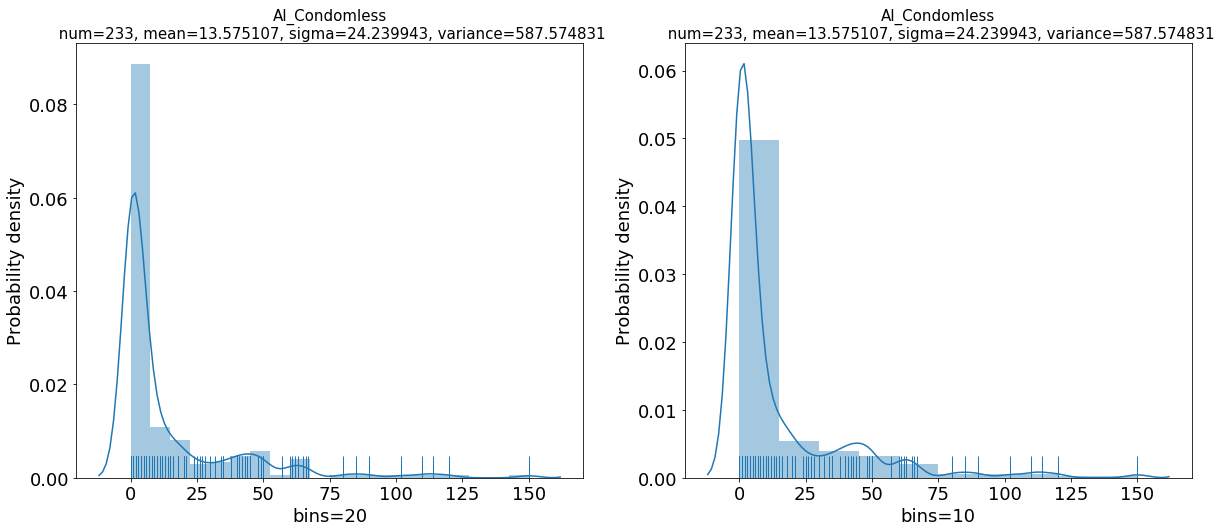

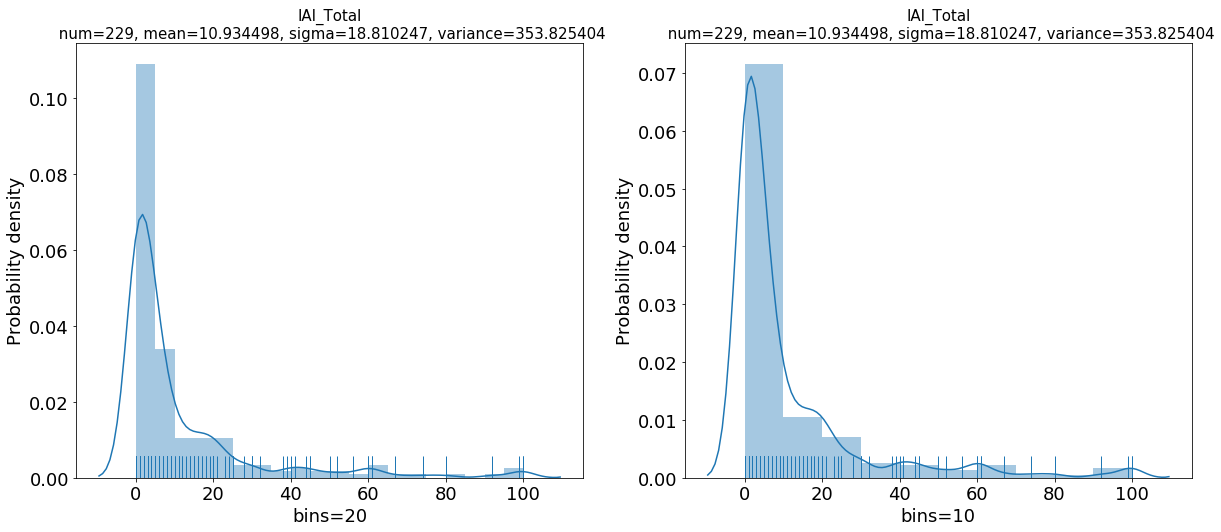

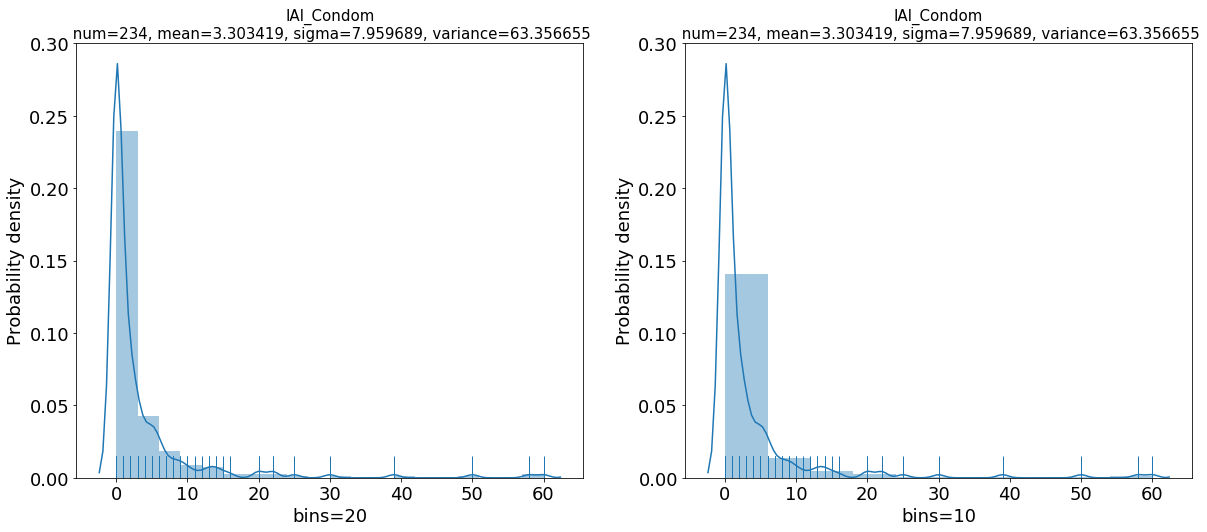

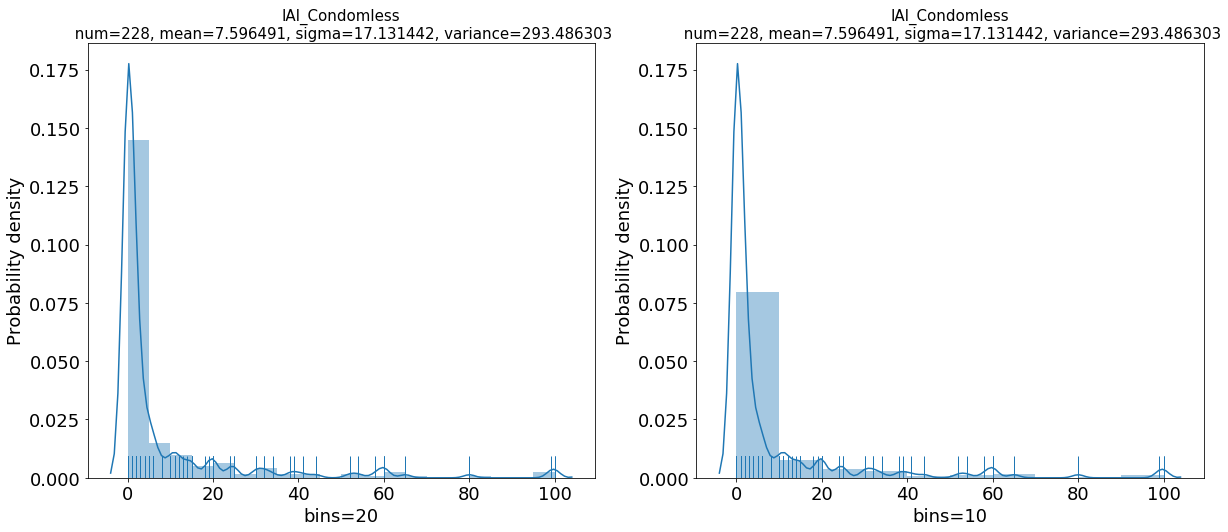

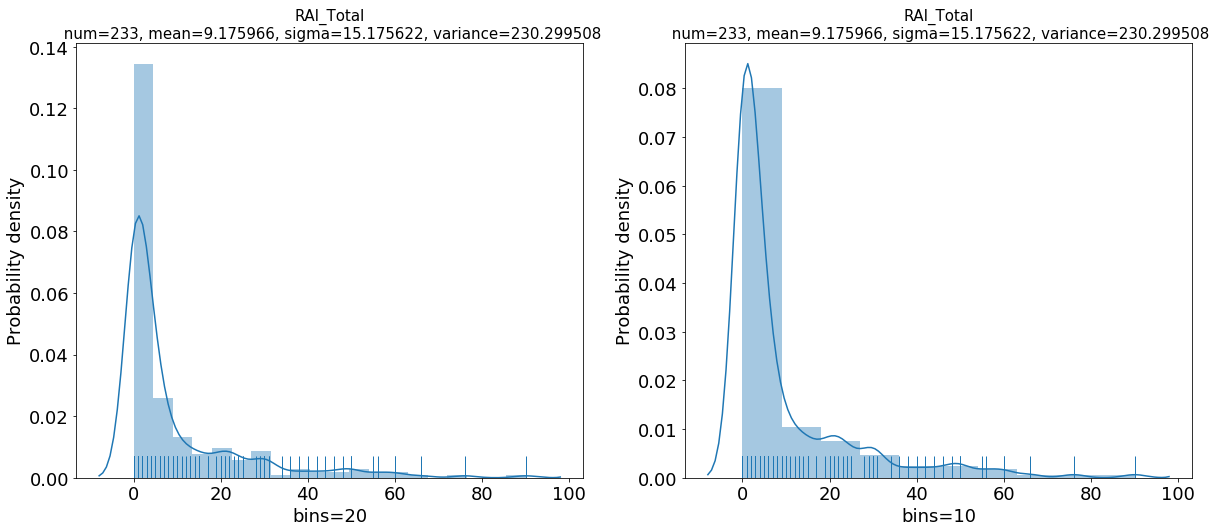

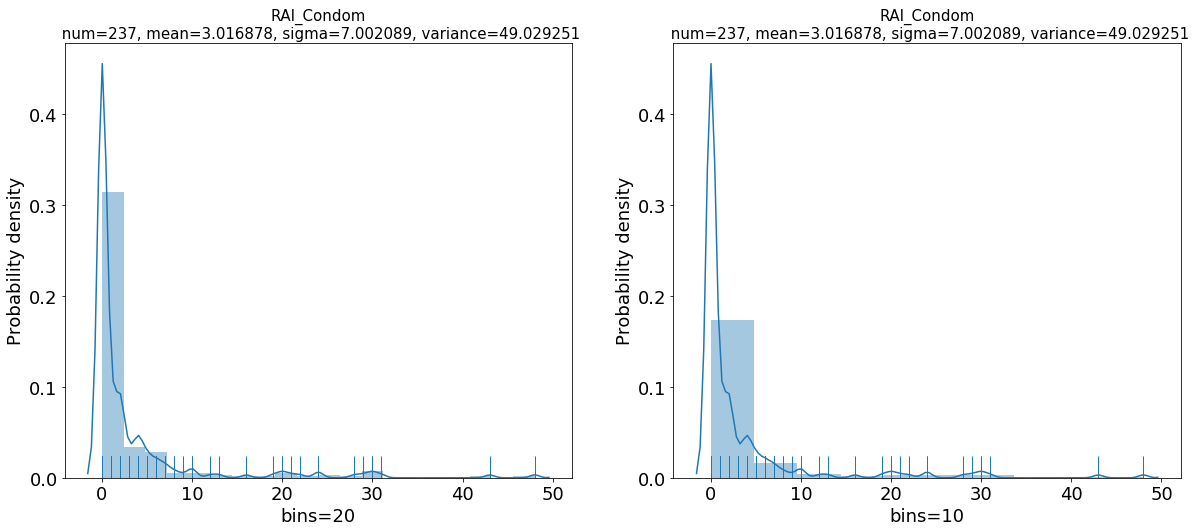

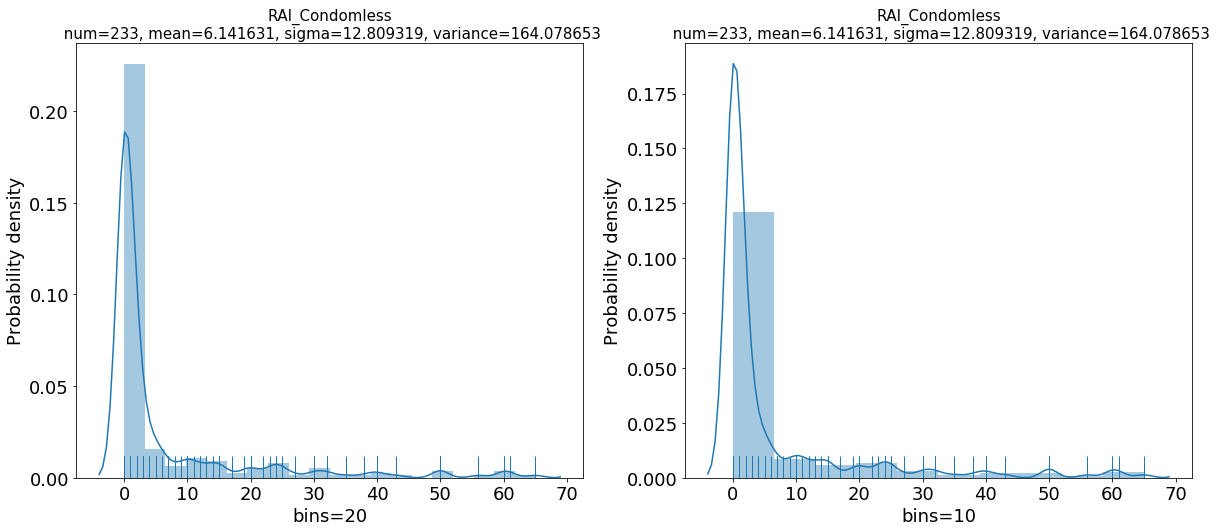

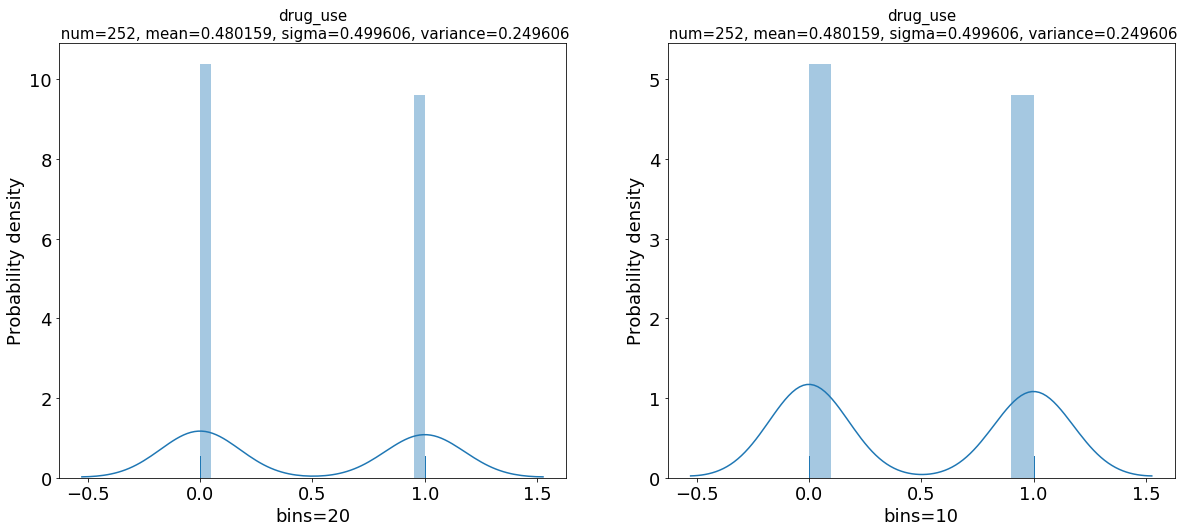

In [5]:
# Draw the figure of survey feature.
for feature in survey_features_list:
    df_feature = df_p18[feature]
    count = 0
    x = []
    for value in df_feature:
        if not np.isnan(value):
            x.append(value)
            count += 1

    mean =np.mean(x)
    sigma =np.std(x)
    variance = np.var(x)
    
#     course initial method using matplot
#     n, bins, patches = plt.hist(x, density=1, facecolor='blue', alpha=0.4) 
#     y = mlab.normpdf(bins, mean, sigma) # fit a line
#     plt.plot(bins, y, 'b--') 
#     plt.xlabel('Value')
#     plt.ylabel('Probability')
#     plt.title("%s: mean= %f, sigma=%f, variance=%f" % (feature, mean, sigma, variance))

#     plt.subplots_adjust(left=0.15)#左边距 
#     plt.show() 

#     Distribution of the variables
#     print("Variable: ", feature)
#     print("Mean: ", mean)
#     print("Standard Error: ", sigma)
#     print("Variance: ", variance)

#     Using seaborn library
    fig,axes=plt.subplots(1,2,figsize=(20,8))
    
    sns.distplot(x, kde=True, bins = 20, rug=True, ax=axes[0])
    axes[0].tick_params(axis='y',labelsize=18)
    axes[0].tick_params(axis='x',labelsize=18)
    axes[0].set_xlabel("bins=20", fontsize=18)
    axes[0].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=15)
    axes[0].set_ylabel("Probability density", fontsize=18)

    sns.distplot(x, kde=True, bins = 10, rug=True, ax=axes[1])
    axes[1].tick_params(axis='y',labelsize=18)
    axes[1].tick_params(axis='x',labelsize=18)
    axes[1].set_xlabel("bins=10", fontsize=18)
    axes[1].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=15)
    axes[1].set_ylabel("Probability density", fontsize=18)

#     break


### More variables

In [11]:
# Draw the figure of survey feature.
for feature in ['agef1y']:
    df_feature = df_p18[feature]
    count = 0
    age_range = [0,0,0,0]
    x = []
    for value in df_feature:
        if not np.isnan(value):
            age = 2019-value
            x.append(age)
            count += 1
            if age == 26.0:
                age_range[0]+=1
            elif age == 27.0:
                age_range[1]+=1
            elif age == 28.0:
                age_range[2]+=1
            elif age == 29.0:
                age_range[3]+=1
            else:
                print(age)
                

    mean =np.mean(x)
    sigma =np.std(x)
    variance = np.var(x)
    
    print('count: ',count)
    print('age_range: ', age_range)
    
#     course initial method using matplot
#     n, bins, patches = plt.hist(x, density=1, facecolor='blue', alpha=0.4) 
#     y = mlab.normpdf(bins, mean, sigma) # fit a line
#     plt.plot(bins, y, 'b--') 
#     plt.xlabel('Value')
#     plt.ylabel('Probability')
#     plt.title("%s: mean= %f, sigma=%f, variance=%f" % (feature, mean, sigma, variance))

#     plt.subplots_adjust(left=0.15)#左边距 
#     plt.show() 

#     Distribution of the variables
#     print("Variable: ", feature)
#     print("Mean: ", mean)
#     print("Standard Error: ", sigma)
#     print("Variance: ", variance)

# # Make a fake dataset:
# height = [3, 12, 5, 18, 45]
# bars = ('A', 'B', 'C', 'D', 'E')
# y_pos = np.arange(len(bars))
 
# # Create bars
# plt.bar(y_pos, height)
 
# # Create names on the x-axis
# plt.xticks(y_pos, bars)

#     Using seaborn library
#     fig,axes=plt.subplots(1,2,figsize=(20,8))
    
#     sns.barplot(x="123", y="32", data = df_p18, ax=axes[0])
#     sns.distplot(x, kde=False, ax=axes[0])
#     axes[0].tick_params(axis='y',labelsize=18)
#     axes[0].tick_params(axis='x',labelsize=18)
#     axes[0].set_xlabel("bins=20", fontsize=18)
#     axes[0].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=15)
#     axes[0].set_ylabel("Probability density", fontsize=18)

#     sns.distplot(x, kde=False, bins = 20, rug=True, ax=axes[1])
#     axes[1].tick_params(axis='y',labelsize=18)
#     axes[1].tick_params(axis='x',labelsize=18)
#     axes[1].set_xlabel("bins=10", fontsize=18)
#     axes[1].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=15)
#     axes[1].set_ylabel("Probability density", fontsize=18)

count:  253
age_range:  [37, 97, 103, 16]


In [91]:
# borough
for feature in ['nabeq1']:
    df_feature = df_p18[feature]
    count = 0
    value_range = [0,0,0,0,0,0,0]
    x = []
    for value in df_feature:
        if not np.isnan(value):
            x.append(value)
            count += 1
            if value == 1:
                value_range[0]+=1
            elif value == 2:
                value_range[1]+=1
            elif value == 3:
                value_range[2]+=1
            elif value == 4:
                value_range[3]+=1
            elif value == 5:
                value_range[4]+=1
            elif value == 6:
                value_range[5]+=1
            elif value == 8:
                value_range[6]+=1
            else:
                print(value)
                

    mean =np.mean(x)
    sigma =np.std(x)
    variance = np.var(x)
    
    print('count: ',count)
    print('value_range: ', value_range)
    

count:  252
value_range:  [32, 86, 75, 28, 4, 27, 0]


In [92]:
# race and ethnicity
for feature in ['racefa1_b']:
    df_feature = df_p18[feature]
    count = 0
    value_range = [0,0,0,0,0,0]
    x = []
    for value in df_feature:
        if not np.isnan(value):
            x.append(value)
            count += 1
            if value == 1:
                value_range[0]+=1
            elif value == 2:
                value_range[1]+=1
            elif value == 3:
                value_range[2]+=1
            elif value == 4:
                value_range[3]+=1
            elif value == 5:
                value_range[4]+=1
            elif value == 6:
                value_range[5]+=1
            else:
                print(value)
                

    mean =np.mean(x)
    sigma =np.std(x)
    variance = np.var(x)
    
    print('count: ',count)
    print('value_range: ', value_range)
    

count:  253
value_range:  [82, 68, 23, 16, 3, 61]


count:  104
value_range:  [0, 0, 0]


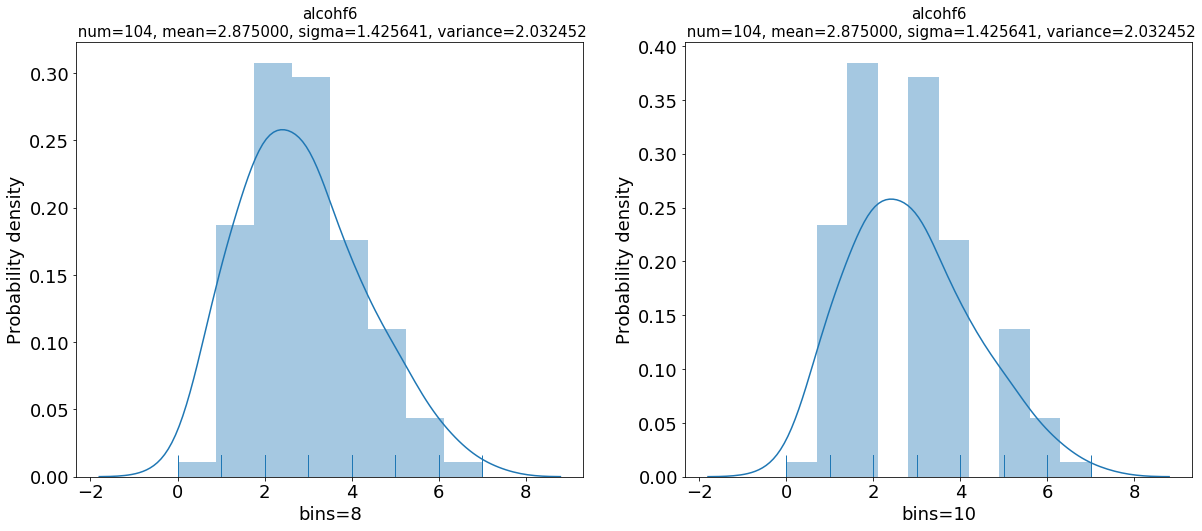

In [105]:
# alcohf6: On average, how many days did you drink an alcoholic beverage each week during the past 6 months?

for feature in ['alcohf6']:
    df_feature = df_p18[feature]
    count = 0
    value_range = [0,0,0]
    x = []
    for value in df_feature:
        if not np.isnan(value):
            x.append(value)
            count += 1
            if value == 97:
                value_range[0]+=1
            elif value == 98:
                value_range[1]+=1
            elif value == 99:
                value_range[2]+=1
#             else:
#                 print(value)

                

    mean =np.mean(x)
    sigma =np.std(x)
    variance = np.var(x)
    
    print('count: ',count)
    print('value_range: ', value_range)
    
    #     Using seaborn library
    fig,axes=plt.subplots(1,2,figsize=(20,8))
    
    sns.distplot(x, kde=True, bins = 8, rug=True, ax=axes[0])
    axes[0].tick_params(axis='y',labelsize=18)
    axes[0].tick_params(axis='x',labelsize=18)
    axes[0].set_xlabel("bins=8", fontsize=18)
    axes[0].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=15)
    axes[0].set_ylabel("Probability density", fontsize=18)

    sns.distplot(x, kde=True, bins = 10, rug=True, ax=axes[1])
    axes[1].tick_params(axis='y',labelsize=18)
    axes[1].tick_params(axis='x',labelsize=18)
    axes[1].set_xlabel("bins=10", fontsize=18)
    axes[1].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=15)
    axes[1].set_ylabel("Probability density", fontsize=18)

count:  218
value_range:  [0, 0, 0]


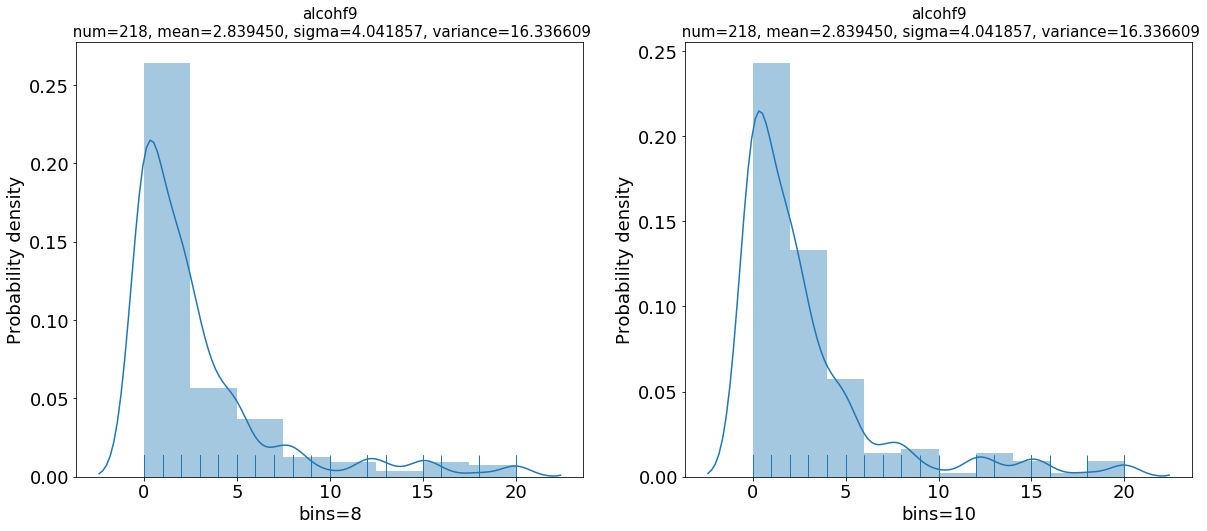

In [14]:
# alcohf9

for feature in ['alcohf9']:
    df_feature = df_p18[feature]
    count = 0
    value_range = [0,0,0]
    x = []
    for value in df_feature:
        if not np.isnan(value):
            x.append(value)
            count += 1
#             if value == 97:
#                 value_range[0]+=1
#             elif value == 98:
#                 value_range[1]+=1
#             elif value == 99:
#                 value_range[2]+=1
#             else:
#                 print(value)

                

    mean =np.mean(x)
    sigma =np.std(x)
    variance = np.var(x)
    
    print('count: ',count)
    print('value_range: ', value_range)
    
    #     Using seaborn library
    fig,axes=plt.subplots(1,2,figsize=(20,8))
    
    sns.distplot(x, kde=True, bins = 8, rug=True, ax=axes[0])
    axes[0].tick_params(axis='y',labelsize=18)
    axes[0].tick_params(axis='x',labelsize=18)
    axes[0].set_xlabel("bins=8", fontsize=18)
    axes[0].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=15)
    axes[0].set_ylabel("Probability density", fontsize=18)

    sns.distplot(x, kde=True, bins = 10, rug=True, ax=axes[1])
    axes[1].tick_params(axis='y',labelsize=18)
    axes[1].tick_params(axis='x',labelsize=18)
    axes[1].set_xlabel("bins=10", fontsize=18)
    axes[1].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=15)
    axes[1].set_ylabel("Probability density", fontsize=18)

count:  147
value_range:  [0, 0, 0]


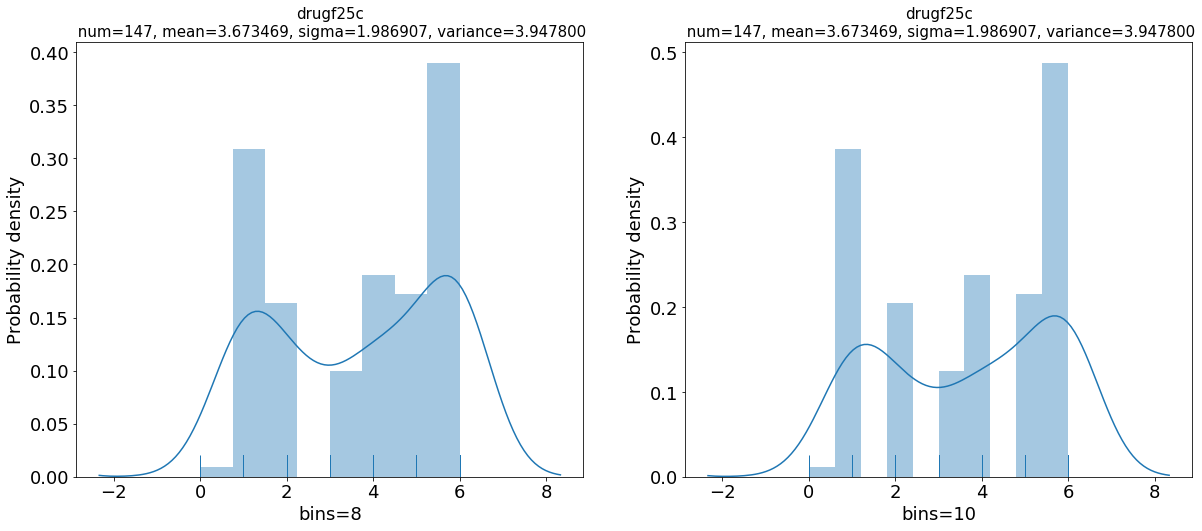

In [15]:
# drugf25c


for feature in ['drugf25c']:
    df_feature = df_p18[feature]
    count = 0
    value_range = [0,0,0]
    x = []
    for value in df_feature:
        if not np.isnan(value):
            x.append(value)
            count += 1
#             if value == 97:
#                 value_range[0]+=1
#             elif value == 98:
#                 value_range[1]+=1
#             elif value == 99:
#                 value_range[2]+=1
#             else:
#                 print(value)

                

    mean =np.mean(x)
    sigma =np.std(x)
    variance = np.var(x)
    
    print('count: ',count)
    print('value_range: ', value_range)
    
    #     Using seaborn library
    fig,axes=plt.subplots(1,2,figsize=(20,8))
    
    sns.distplot(x, kde=True, bins = 8, rug=True, ax=axes[0])
    axes[0].tick_params(axis='y',labelsize=18)
    axes[0].tick_params(axis='x',labelsize=18)
    axes[0].set_xlabel("bins=8", fontsize=18)
    axes[0].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=15)
    axes[0].set_ylabel("Probability density", fontsize=18)

    sns.distplot(x, kde=True, bins = 10, rug=True, ax=axes[1])
    axes[1].tick_params(axis='y',labelsize=18)
    axes[1].tick_params(axis='x',labelsize=18)
    axes[1].set_xlabel("bins=10", fontsize=18)
    axes[1].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=15)
    axes[1].set_ylabel("Probability density", fontsize=18)

count:  3
value_range:  [0, 0, 0]


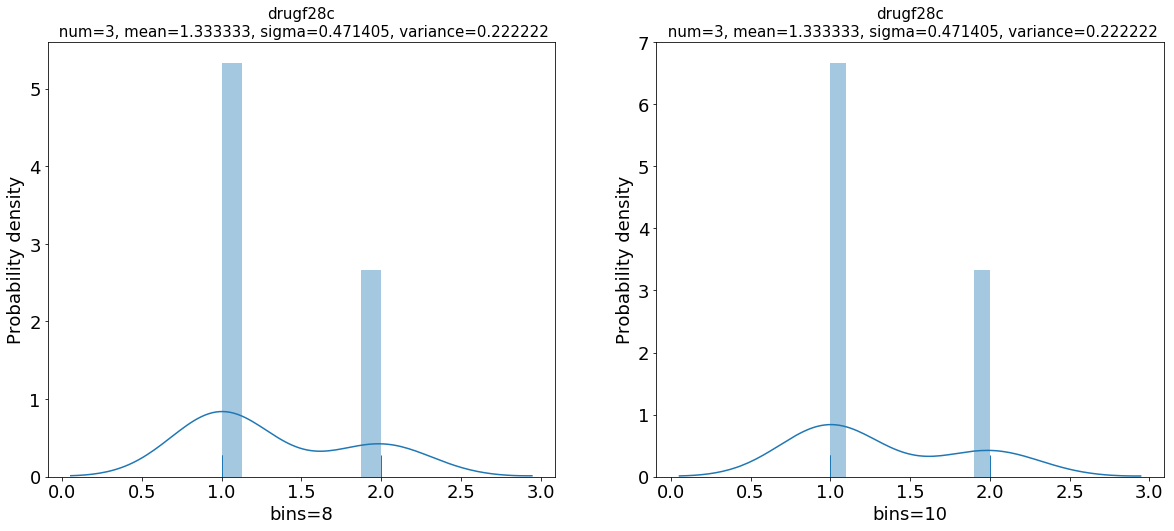

In [17]:
# drugf28c


for feature in ['drugf28c']:
    df_feature = df_p18[feature]
    count = 0
    value_range = [0,0,0]
    x = []
    for value in df_feature:
        if not np.isnan(value):
            x.append(value)
            count += 1
#             if value == 97:
#                 value_range[0]+=1
#             elif value == 98:
#                 value_range[1]+=1
#             elif value == 99:
#                 value_range[2]+=1
#             else:
#                 print(value)

                

    mean =np.mean(x)
    sigma =np.std(x)
    variance = np.var(x)
    
    print('count: ',count)
    print('value_range: ', value_range)
    
    #     Using seaborn library
    fig,axes=plt.subplots(1,2,figsize=(20,8))
    
    sns.distplot(x, kde=True, bins = 8, rug=True, ax=axes[0])
    axes[0].tick_params(axis='y',labelsize=18)
    axes[0].tick_params(axis='x',labelsize=18)
    axes[0].set_xlabel("bins=8", fontsize=18)
    axes[0].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=15)
    axes[0].set_ylabel("Probability density", fontsize=18)

    sns.distplot(x, kde=True, bins = 10, rug=True, ax=axes[1])
    axes[1].tick_params(axis='y',labelsize=18)
    axes[1].tick_params(axis='x',labelsize=18)
    axes[1].set_xlabel("bins=10", fontsize=18)
    axes[1].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=15)
    axes[1].set_ylabel("Probability density", fontsize=18)

count:  41
value_range:  [0, 0, 0]


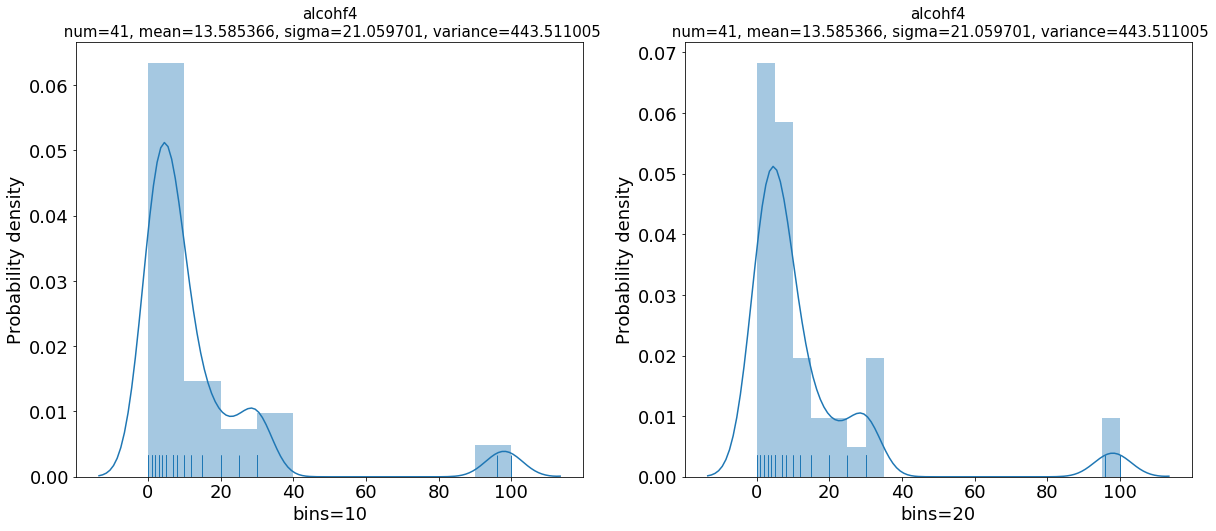

In [21]:
# alcohf4


for feature in ['alcohf4']:
    df_feature = df_p18[feature]
    count = 0
    value_range = [0,0,0]
    x = []
    for value in df_feature:
        if not np.isnan(value):
            x.append(value)
            count += 1
#             if value == 97:
#                 value_range[0]+=1
#             elif value == 98:
#                 value_range[1]+=1
#             elif value == 99:
#                 value_range[2]+=1
#             else:
#                 print(value)

                

    mean =np.mean(x)
    sigma =np.std(x)
    variance = np.var(x)
    
    print('count: ',count)
    print('value_range: ', value_range)
    
    #     Using seaborn library
    fig,axes=plt.subplots(1,2,figsize=(20,8))
    
    sns.distplot(x, kde=True, bins = 10, rug=True, ax=axes[0])
    axes[0].tick_params(axis='y',labelsize=18)
    axes[0].tick_params(axis='x',labelsize=18)
    axes[0].set_xlabel("bins=10", fontsize=18)
    axes[0].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=15)
    axes[0].set_ylabel("Probability density", fontsize=18)

    sns.distplot(x, kde=True, bins = 20, rug=True, ax=axes[1])
    axes[1].tick_params(axis='y',labelsize=18)
    axes[1].tick_params(axis='x',labelsize=18)
    axes[1].set_xlabel("bins=20", fontsize=18)
    axes[1].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=15)
    axes[1].set_ylabel("Probability density", fontsize=18)

Now process the discrimination data.

In [56]:
df_discrimination = pd.read_csv(discrimination_data_path)
df_discrimination[:3]

,Grid_ID,Lat,Lon,TotalTweets.x,RacistTweets,NormalRacistTweets (in %),Zip,Zip_Rac (in %),SSSOM_Rac (in %),HomophobicTweets,NormalHomoTweets (in %),Zip_Hom (in %),SSSOM_Hom (in %)
0,1,40.497,-74.247,1,0,0.0,10307.0,0.4636,0.4812,0,0.0,1.9292,1.8332
1,2,40.498,-74.249,1,0,0.0,10307.0,0.4636,0.4812,1,100.0,1.9292,1.8332
2,3,40.498,-74.248,1,0,0.0,10307.0,0.4636,0.4812,0,0.0,1.9292,1.8332


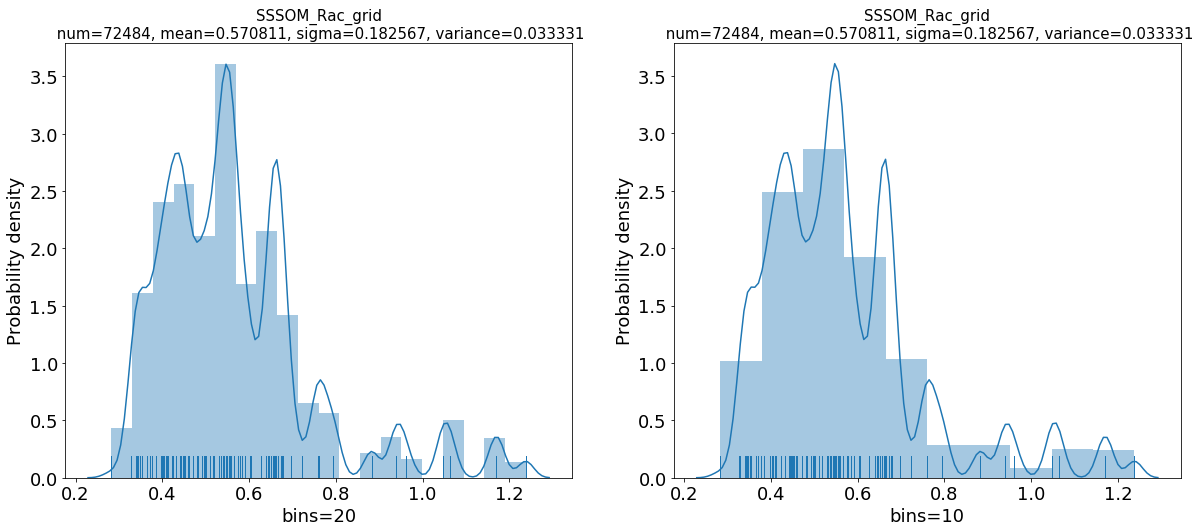

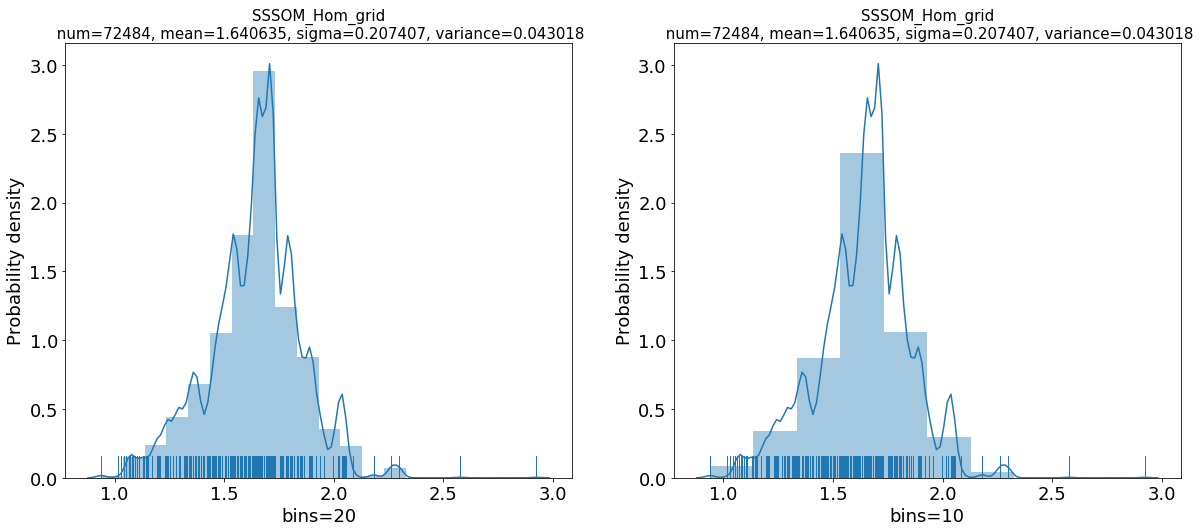

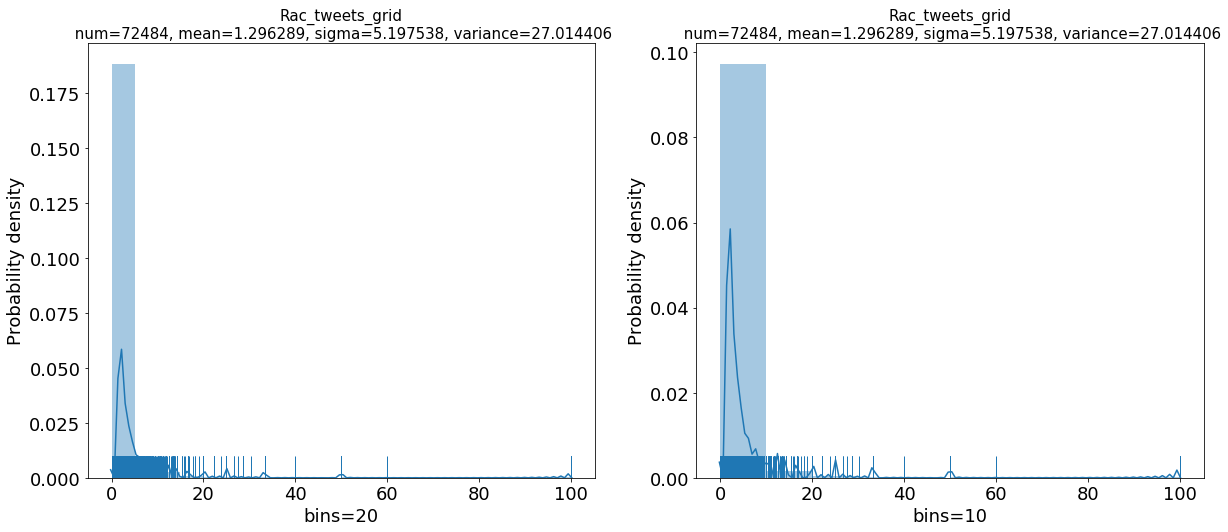

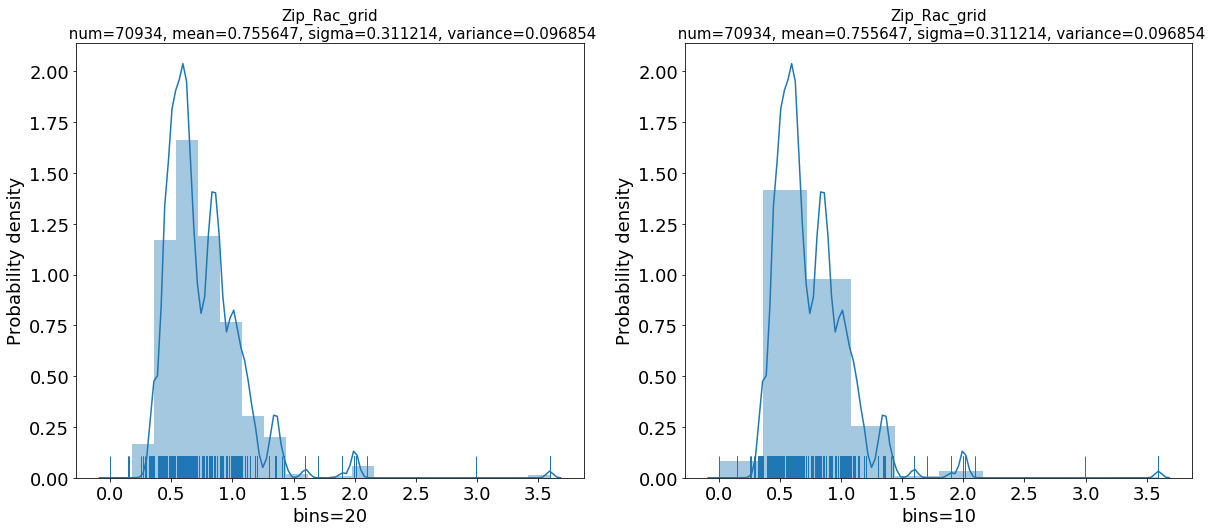

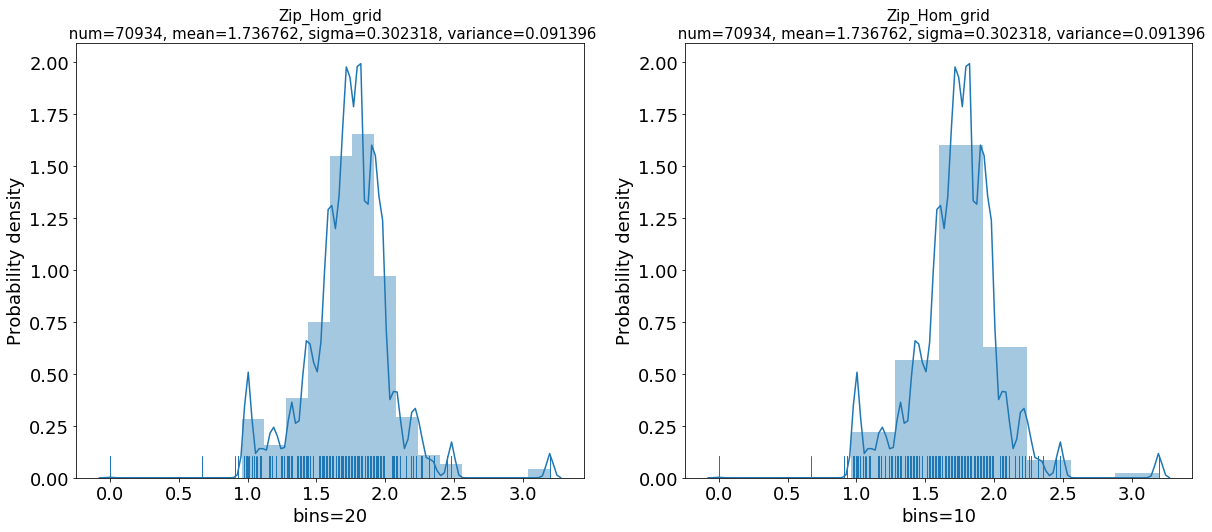

In [57]:
# Draw the figure of discrimination feature.
for feature in discrimination_features_list:
        
    df_feature = df_discrimination[feature]
    count = 0
    x = []
    for value in df_feature:
        if not np.isnan(value):
            x.append(value)
            count += 1

    mean =np.mean(x)
    sigma =np.std(x)
    variance = np.var(x)

#     Using seaborn library
    fig,axes=plt.subplots(1,2,figsize=(20,8))
    
#     Change the title
    title_feature = discrimination_features_dict[feature]
#     if feature == "NormalRacistTweets (in %)":
#         feature = "P_racist_grid (in %)"
    
    sns.distplot(x, kde=True, bins = 20, rug=True, ax=axes[0])
    axes[0].tick_params(axis='y',labelsize=18)
    axes[0].tick_params(axis='x',labelsize=18)
    axes[0].set_xlabel("bins=20", fontsize=18)
    axes[0].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (title_feature, len(x), mean, sigma, variance), fontsize=15)
    axes[0].set_ylabel("Probability density", fontsize=18)

    sns.distplot(x, kde=True, bins = 10, rug=True, ax=axes[1])
    axes[1].tick_params(axis='y',labelsize=18)
    axes[1].tick_params(axis='x',labelsize=18)
    axes[1].set_xlabel("bins=10", fontsize=18)
    axes[1].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (title_feature, len(x), mean, sigma, variance), fontsize=15)
    axes[1].set_ylabel("Probability density", fontsize=18)

#     break


In [61]:
df_statistic_discrimination = pd.read_excel(statistic_discrimination_data_path)
df_statistic_discrimination[:3]

,PID,AWM_Zip_Hom,AWM_Zip_Rac,AWM_Rac_tweets,AWM_SSSOM_Rac,AWM_SSSOM_Hom,Area_km
0,9013,1.936127,1.350178,0.379630,0.502755,1.778940,11.945497
1,9851,1.653926,0.957245,0.064516,0.484351,1.572026,12.307333
2,9158,1.949714,1.186361,0.475870,0.577084,1.563838,47.136857


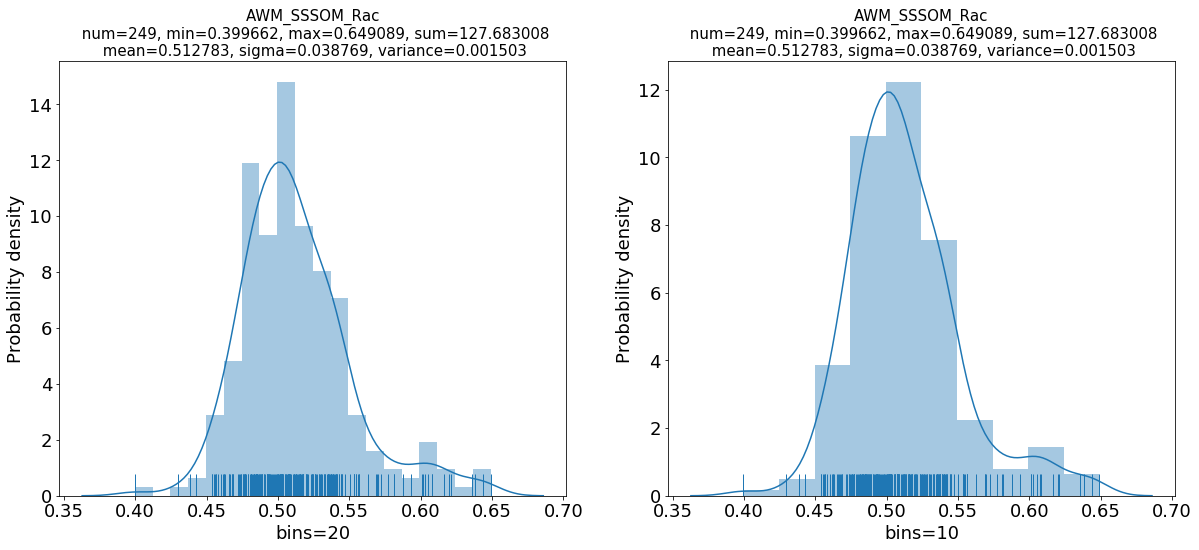

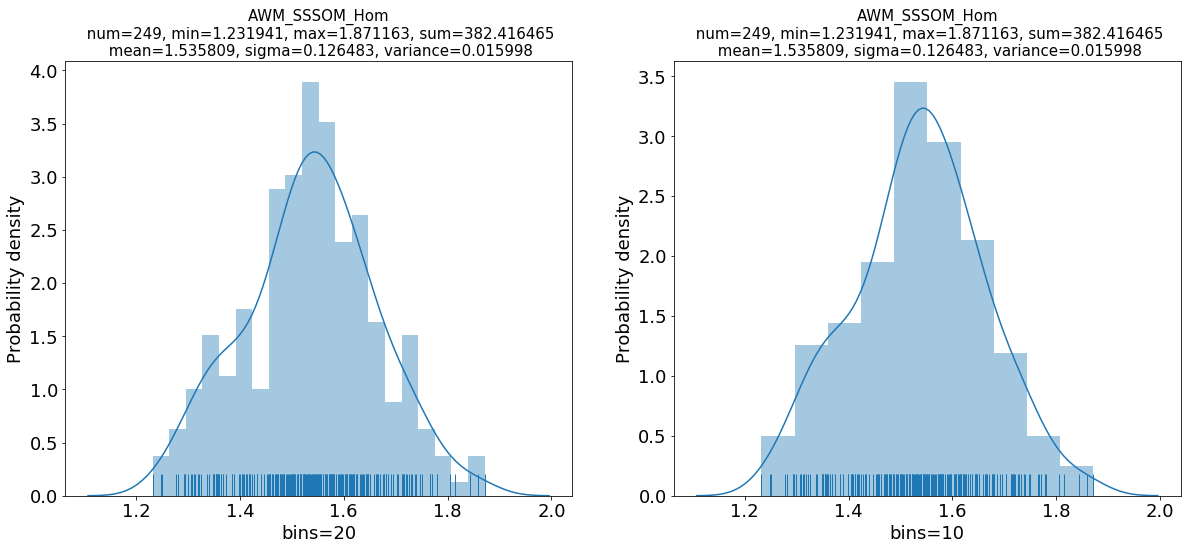

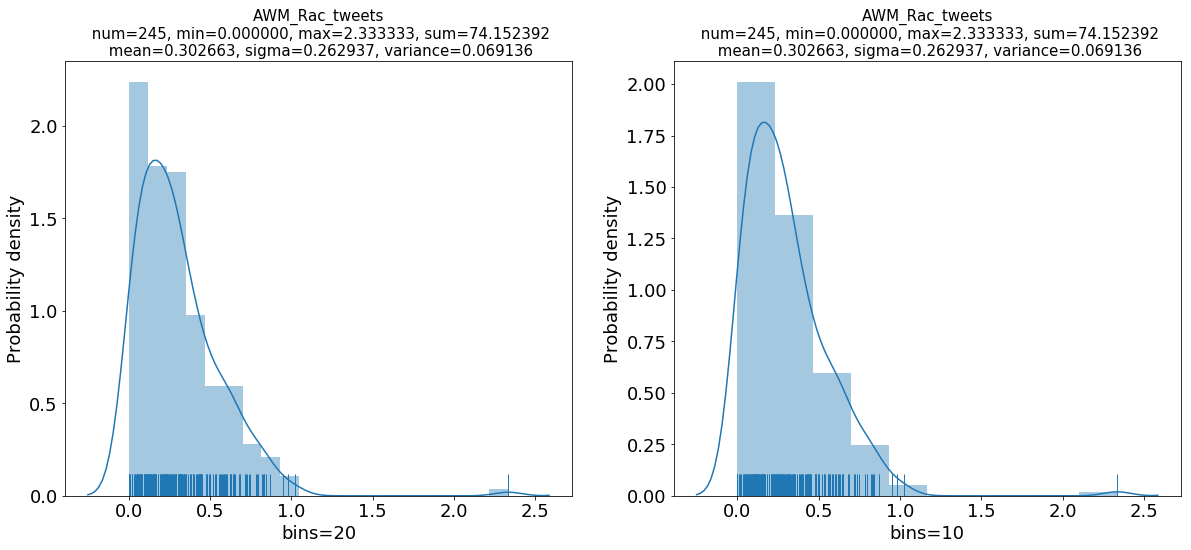

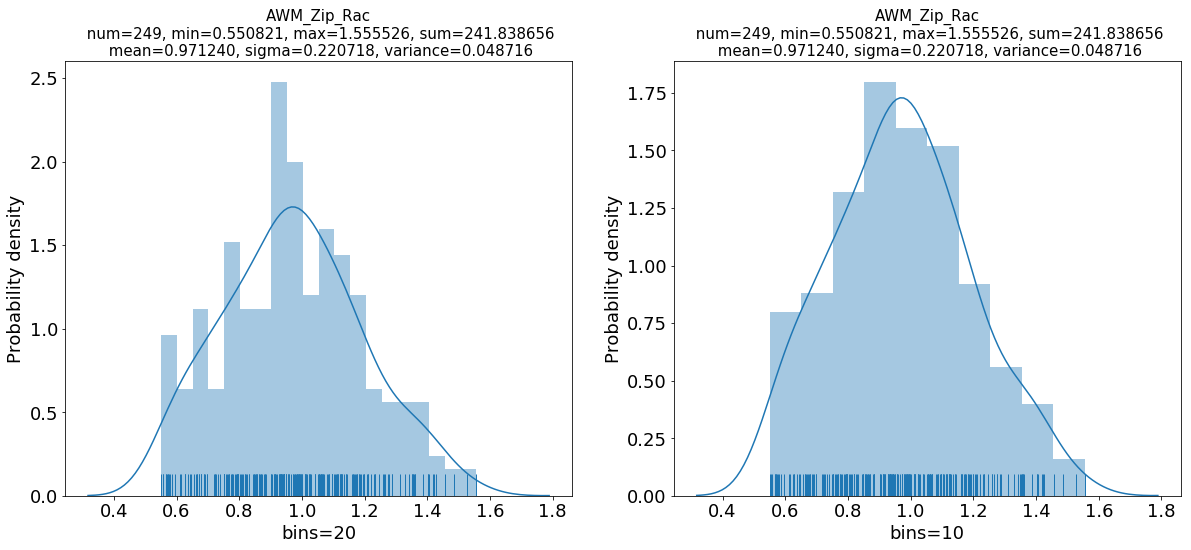

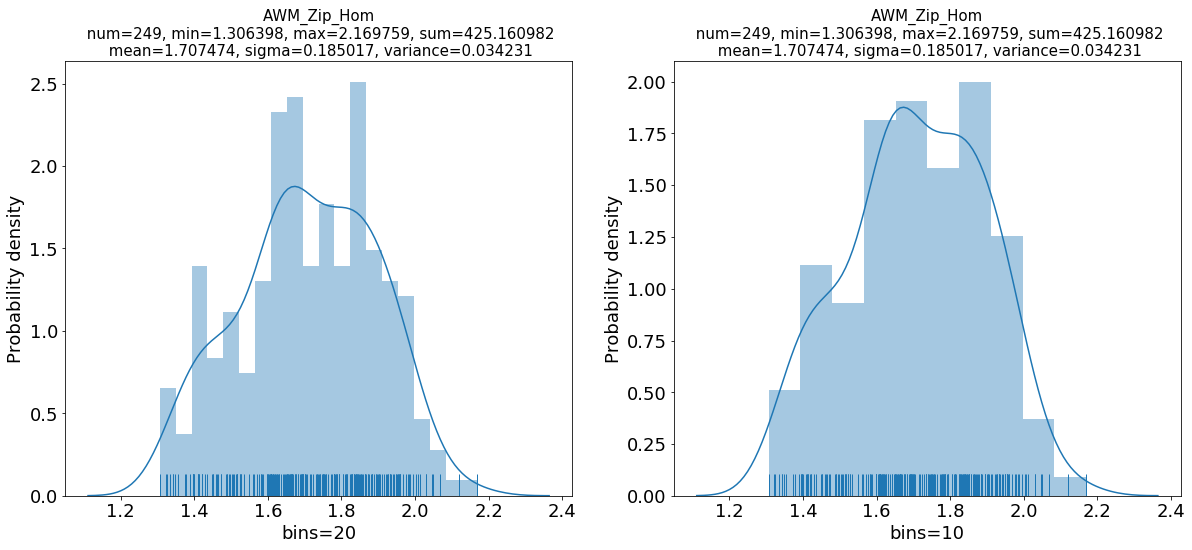

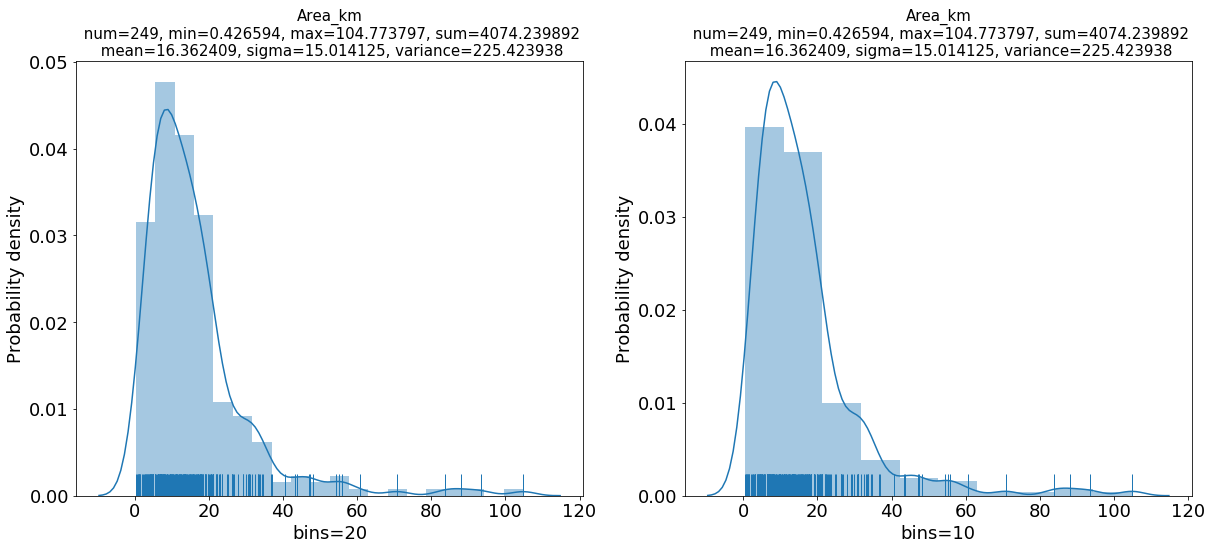

In [62]:
# Draw the figure of statistical discrimination feature.
for feature in AWM_discrimination_features_list:
        
    df_feature = df_statistic_discrimination[feature]
    count = 0
    x = []
    for value in df_feature:
        if not np.isnan(value):
            x.append(value)
            count += 1

    min_value = np.min(x)
    max_value = np.max(x)
    sum_value = np.sum(x)
    mean =np.mean(x)
    sigma =np.std(x)
    variance = np.var(x)

#     Using seaborn library
    fig,axes=plt.subplots(1,2,figsize=(20,8))
    
#     Change the title
#     if feature == "AWM_Norm_R_tweets":
#         feature = "AWM_Rac_tweets"
    
    sns.distplot(x, kde=True, bins = 20, rug=True, ax=axes[0])
    axes[0].tick_params(axis='y',labelsize=18)
    axes[0].tick_params(axis='x',labelsize=18)
    axes[0].set_xlabel("bins=20", fontsize=18)
    axes[0].set_title("%s\n num=%d, min=%f, max=%f, sum=%f\n mean=%f, sigma=%f, variance=%f" % (feature, len(x), min_value, max_value, sum_value, mean, sigma, variance), fontsize=15)
    axes[0].set_ylabel("Probability density", fontsize=18)

    sns.distplot(x, kde=True, bins = 10, rug=True, ax=axes[1])
    axes[1].tick_params(axis='y',labelsize=18)
    axes[1].tick_params(axis='x',labelsize=18)
    axes[1].set_xlabel("bins=10", fontsize=18)
    axes[1].set_title("%s\n num=%d, min=%f, max=%f, sum=%f\n mean=%f, sigma=%f, variance=%f" % (feature, len(x), min_value, max_value, sum_value, mean, sigma, variance), fontsize=15)
    axes[1].set_ylabel("Probability density", fontsize=18)

#     break
